# About Notebook
In this notebook, I use 3 algorithms:
- DecisionTreeClassifier
- RandomForestClassifier
- XGBClassifier
I run these 3 algorithms on same dataset wich is titanic. And then compare their accuracy.

**Also:**

I focused on evaluation metrics used for classification, such as :
- Accuracy Score
- Precision Score
- Recall Score
- F1 Score
- Confusion Matrix
- Classification Report

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [87]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Preprocessing:
First, we will preprocess the dataset, then we will do train test split. In preprocessing we will do:
- Drop Unnecessary Columns
- Handling Missing Values
- Handling Categorical Features

In [88]:
df.shape

(891, 15)

In [89]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Drop Unnecessary Columns

In [91]:
df.drop(columns=["class","who","adult_male","deck","embark_town","alive","alone","parch"], inplace=True)

In [92]:
df.head()

,survived,pclass,sex,age,sibsp,fare,embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


## Handling Missing Values

In [93]:
# imputing age column
def age_imputer(col):
    age = col[0]
    pclass = col[1]
    if pd.isnull(age):
        if pclass==1:
            return 23
        elif pclass==2:
            return 27
        else:
            return 30
    else:
        return age
    
df["age"] = df[["age","pclass"]].apply(age_imputer, axis=1)

In [94]:
# imputing embark column
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [95]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
fare        0
embarked    0
dtype: int64

## Handling Categorical Features

In [96]:
# encoding sex column
df["sex"] = df["sex"].replace({
    "male":0,
    "female":1
})

In [99]:
ohe = OneHotEncoder(sparse_output=False, drop="first")
embark_encoded = ohe.fit_transform(df[["embarked"]])
embark_encoded

array([[0., 1.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [100]:
embark_encoded_df = pd.DataFrame(embark_encoded, columns=ohe.get_feature_names_out(["embarked"]))
embark_encoded_df

,embarked_Q,embarked_S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,0.0,1.0
888,0.0,1.0
889,0.0,0.0


In [101]:
df = pd.concat([df, embark_encoded_df], axis=1)
df

,survived,pclass,sex,age,sibsp,fare,embarked,embarked_Q,embarked_S
0,0,3,0,22.0,1,7.2500,S,0.0,1.0
1,1,1,1,38.0,1,71.2833,C,0.0,0.0
2,1,3,1,26.0,0,7.9250,S,0.0,1.0
3,1,1,1,35.0,1,53.1000,S,0.0,1.0
4,0,3,0,35.0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,13.0000,S,0.0,1.0
887,1,1,1,19.0,0,30.0000,S,0.0,1.0
888,0,3,1,30.0,1,23.4500,S,0.0,1.0
889,1,1,0,26.0,0,30.0000,C,0.0,0.0


In [102]:
df.drop("embarked", axis=1, inplace=True)

In [104]:
df.sample(3)

,survived,pclass,sex,age,sibsp,fare,embarked_Q,embarked_S
370,1,1,0,25.0,1,55.4417,0.0,0.0
495,0,3,0,30.0,0,14.4583,0.0,0.0
587,1,1,0,60.0,1,79.2000,0.0,0.0


### Preprocessing task is completed!

# Train Test Split

In [105]:
# train test split
x = df.drop("survived", axis=1)
y = df["survived"]

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)

In [106]:
len(x_train), len(x_test)

(712, 179)

## 1. Decision Tree Classifier

In [108]:
# train decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("--"*30)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print("--"*30)
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print("--"*30)
print(f"f1-Score: {f1_score(y_test, y_pred)}")
print("--"*30)
print(confusion_matrix(y_test, y_pred))
print("--"*30)
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7988826815642458
------------------------------------------------------------
Precision Score: 0.8
------------------------------------------------------------
Recall Score: 0.6933333333333334
------------------------------------------------------------
f1-Score: 0.7428571428571429
------------------------------------------------------------
[[91 13]
 [23 52]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       104
           1       0.80      0.69      0.74        75

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



<Axes: >

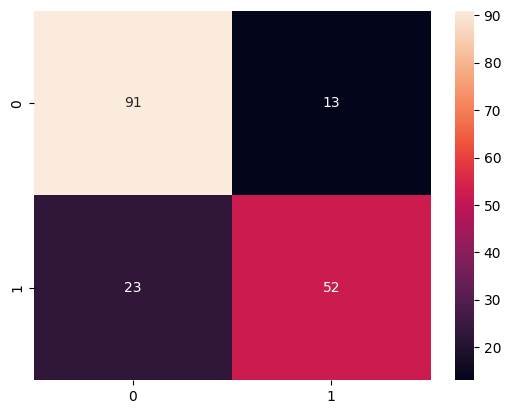

In [112]:
# heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## 2. Random Forest Classifier

In [113]:
# train decision tree classifier
dt = RandomForestClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("--"*30)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print("--"*30)
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print("--"*30)
print(f"f1-Score: {f1_score(y_test, y_pred)}")
print("--"*30)
print(confusion_matrix(y_test, y_pred))
print("--"*30)
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8156424581005587
------------------------------------------------------------
Precision Score: 0.8387096774193549
------------------------------------------------------------
Recall Score: 0.6933333333333334
------------------------------------------------------------
f1-Score: 0.7591240875912408
------------------------------------------------------------
[[94 10]
 [23 52]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       104
           1       0.84      0.69      0.76        75

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



<Axes: >

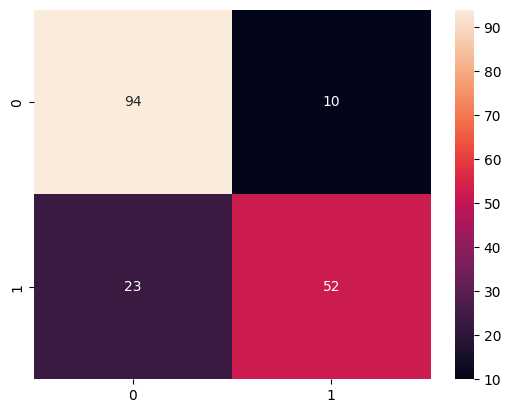

In [114]:
# heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## 3. XGB Classifier

In [115]:
# train decision tree classifier
dt = XGBClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("--"*30)
print(f"Precision Score: {precision_score(y_test, y_pred)}")
print("--"*30)
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print("--"*30)
print(f"f1-Score: {f1_score(y_test, y_pred)}")
print("--"*30)
print(confusion_matrix(y_test, y_pred))
print("--"*30)
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7821229050279329
------------------------------------------------------------
Precision Score: 0.7903225806451613
------------------------------------------------------------
Recall Score: 0.6533333333333333
------------------------------------------------------------
f1-Score: 0.7153284671532847
------------------------------------------------------------
[[91 13]
 [26 49]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       104
           1       0.79      0.65      0.72        75

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



<Axes: >

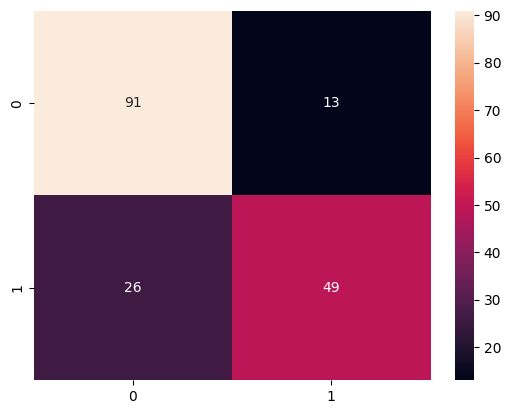

In [116]:
# heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)